<a href="https://colab.research.google.com/github/Clustering-Crew/UNIV-6080-Notebooks/blob/main/EigenvaluesAndEigenvectors_With_Exercise_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import pi, cos, sin

# Eigenvalues and Eigenvectors

Figure 4.4 of the course textbook depects five transformation matrices $\mathbf{A}_1, \ldots, \mathbf{A}_5$ and their impact on a square grid of points, centred at the origin. Let's use `numpy.linalg.eig` to compute the eigenspectrum of each of these matrices.

Note that the first array returned by `np.linalg.eig` are the eigenvalues, not necessarily ordered.
The second array returned is an array where the *columns* are normalized (unit "length") eigenvectors.

## Expansion on one axis and compression on the other

$$\mathbf{A}_1 =
\begin{bmatrix}
\frac{1}{2} & 0\\
0 & 2
\end{bmatrix}
$$

In [ ]:
A1 = np.array([[1/2, 0], [0, 2]])
print(np.linalg.eig(A1))
print(np.linalg.det(A1))

EigResult(eigenvalues=array([0.5, 2. ]), eigenvectors=array([[1., 0.],
       [0., 1.]]))
1.0


Here we see that the direction of the two eigenvectors corresponds to the canonical basis in $\mathbb{R}^2$. One axis is scaled by a factor of 2 and the other is scaled by a factor of 0.5 (i.e. it is squished).

Because the determinant is 1, the transformation is area-preserving.

## Shearing

$$\mathbf{A}_2 =
\begin{bmatrix}
1 & \frac{1}{2}\\
0 & 1
\end{bmatrix}
$$

In [ ]:
A2 = np.array([[1, 1/2], [0, 1]])
print(np.linalg.eig(A2))
print(np.linalg.det(A2))

EigResult(eigenvalues=array([1., 1.]), eigenvectors=array([[ 1.0000000e+00, -1.0000000e+00],
       [ 0.0000000e+00,  4.4408921e-16]]))
1.0


Here we see that the eigenvectors are collinear, indicating that the mapping only happens along one direction (the horizontal axis). The eigenvalue (1) is repeated.

Again, the transformation is area-preserving as the determinant is 1.

## Rotation

$$\mathbf{A}_3 =
\begin{bmatrix}
\cos\left(\frac{\pi}{6}\right) & - \sin\left( \frac{\pi}{6}\right)\\
\sin\left(\frac{\pi}{6}\right) &  \cos\left( \frac{\pi}{6}\right)
\end{bmatrix}
$$

In [ ]:
A3 = np.array([[cos(pi/6), -sin(pi/6)], [sin(pi/6), cos(pi/6)]])
print(np.linalg.eig(A3))
print(np.linalg.det(A3))

EigResult(eigenvalues=array([0.8660254+0.5j, 0.8660254-0.5j]), eigenvectors=array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]]))
1.0


Here the matrix only has complex eigenvalues, reflecting that the mapping is a rotation.

A rotation has to be volume preserving, so the determinant is again 1.

## Collapses a two-dimensional domain into one dimension

$$\mathbf{A}_4 =
\begin{bmatrix}
1 & -1\\
-1 & 1
\end{bmatrix}
$$

In [ ]:
A4 = np.array([[1, -1], [-1, 1]])
print(np.linalg.eig(A4))
print(np.linalg.det(A4))

EigResult(eigenvalues=array([2., 0.]), eigenvectors=array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]))
0.0


Since one eigenvalue is 0, the space in the direction of the corresponding eigenvector collapses, while space in the direction of the other eigenvector is stretched by a factor of 2.

Since the two dimensional domain has been collapsed into a single dimension, the determinant is 0.

## Shear-and-stretch mapping that shrinks space

$$\mathbf{A}_5 =
\begin{bmatrix}
1 & \frac{1}{2}\\
\frac{1}{2} & 1
\end{bmatrix}
$$

In [ ]:
A5 = np.array([[1, 1/2], [1/2, 1]])
print(np.linalg.eig(A5))
print(np.linalg.det(A5))

EigResult(eigenvalues=array([1.5, 0.5]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))
0.75


This mapping stretches space along one eigenvector by a factor of 1.5 and compresses it along the orthogonal eigenvector by a factor of 0.5.

The determinant is 0.75 which means that overall the transformation shrinks space by 75%.

## Exercise

Use Matplotlib to approximately reproduce the plots in Figure 4.4. This will require you to create 400 points in $\mathbb{R}^2$. Check out `numpy.mgrid`. You could start with a loop, and then try to figure out a way to more efficiently apply the linear transformation to each of the points.

Text(0.5, 1.0, 'Transformation 5')

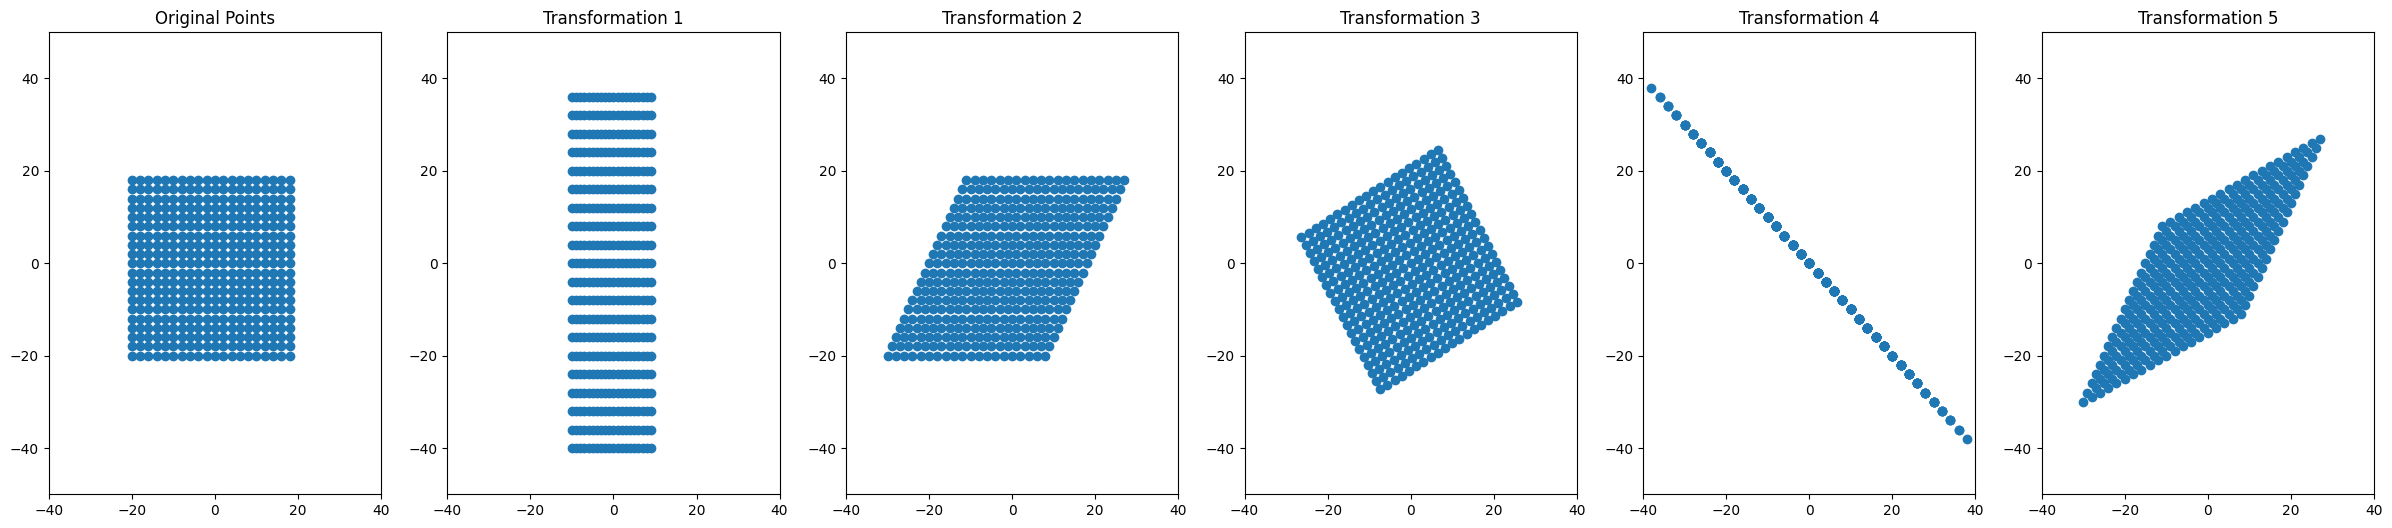

In [ ]:
# Exercise Solution
import numpy as np
import matplotlib.pyplot as plt

# Create the point grid
point_grid_x = np.mgrid[-20:20:2]
point_grid_y = np.mgrid[-20:20:2]

# Create a meshgrid from the points generated
x, y = np.meshgrid(point_grid_x, point_grid_y)

# Flatten the (20, 20) meshes to create points with (2, 200) dimension.
points = np.vstack((x.ravel(), y.ravel()))

# Transformations
transformation_1 = np.matmul(A1, points)
transformation_2 = np.matmul(A2, points)
transformation_3 = np.matmul(A3, points)
transformation_4 = np.matmul(A4, points)
transformation_5 = np.matmul(A5, points)

#
fig, axes = plt.subplots(1, 6, figsize=(30, 6))

plt.setp(axes, xlim=(-40, 40), ylim=(-50, 50))

axes[0].scatter(points[0, :], points[1, :])
axes[0].set_title("Original Points")

axes[1].scatter(transformation_1[0, :], transformation_1[1, :])
axes[1].set_title("Transformation 1")

axes[2].scatter(transformation_2[0, :], transformation_2[1, :])
axes[2].set_title("Transformation 2")

axes[3].scatter(transformation_3[0, :], transformation_3[1, :])
axes[3].set_title("Transformation 3")

axes[4].scatter(transformation_4[0, :], transformation_4[1, :])
axes[4].set_title("Transformation 4")

axes[5].scatter(transformation_5[0, :], transformation_5[1, :])
axes[5].set_title("Transformation 5")